## OBJECTIVE
* To build a predictive model that accurately forecasts the Gold Price (GLD) using various financial indicators such as crude oil prices, stock indices, and exchange rates. The goal is to help investors and analysts make informed decisions by understanding the key drivers influencing gold price fluctuations.

## PROBLEM STATEMENT
* Gold is one of the most valuable and volatile commodities in the financial market. Numerous macroeconomic and financial factors influence its price. This project aims to analyze historical data and develop a regression model that can predict the Gold Price (GLD) based on features such as:

* Crude Oil Prices

* Stock Market Indexes (e.g., S&P 500)

* Exchange Rates (USD-related)

* Other correlated economic indicators

* By solving this problem, we can better understand the relationships between gold and other financial metrics, thereby aiding in risk management and investment strategies

In [159]:
# let us load the libaries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv(r'C:\Users\tejag\Downloads\gld_price_data.csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [162]:
df.shape

(2290, 6)

## DATA CLEANING
* finding the missing values
* finding the ouliers
* seeing duplicates 

In [164]:
# let us find the missing values 
df.isnull().sum()/len(df)*100

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [165]:
# checking the duplicates 
df.duplicated().sum() # there are no duplicates are contain

0

In [166]:
# converting to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

In [167]:
df['date'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.drop(columns = ['Date'], inplace = True)

In [168]:
df

,SPX,GLD,USO,SLV,EUR/USD,date,month,year
0,1447.160034,84.860001,78.470001,15.1800,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.2850,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.1670,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.0530,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.5900,1.557099,8,1,2008
...,...,...,...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789,8,5,2018
2286,2697.790039,124.330002,14.370000,15.5300,1.184722,9,5,2018
2287,2723.070068,125.180000,14.410000,15.7400,1.191753,10,5,2018
2288,2730.129883,124.489998,14.380000,15.5600,1.193118,14,5,2018


## Selection of Target Variable And Predictors

In [170]:
# target variable 
X = df.drop(columns = ['GLD'])
y = df['GLD']
y.shape

(2290,)

In [171]:
# predictors 
predictors = ['SPX', 'USO', 'SLV', 'EUR/USD']

## Univariate analysis 

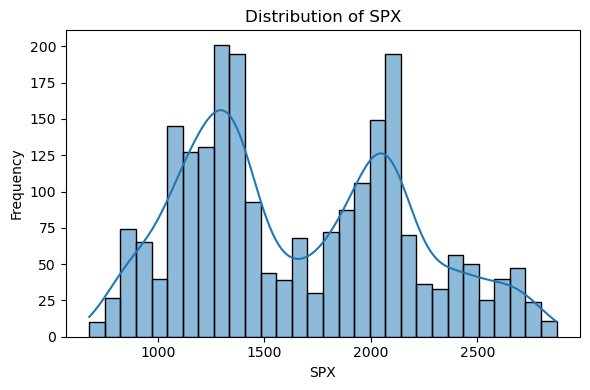

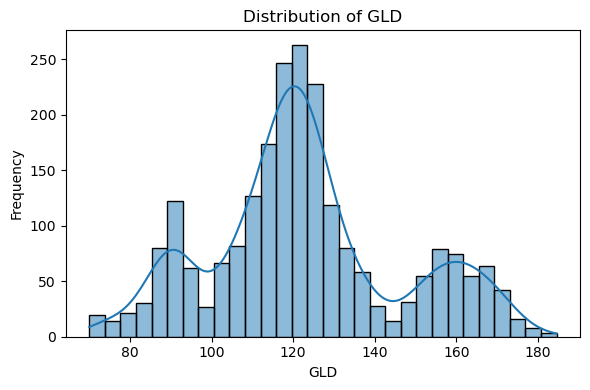

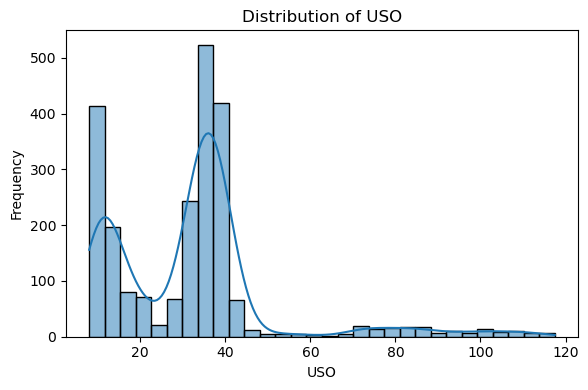

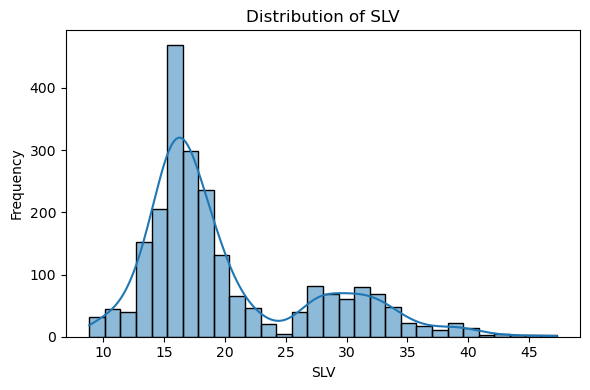

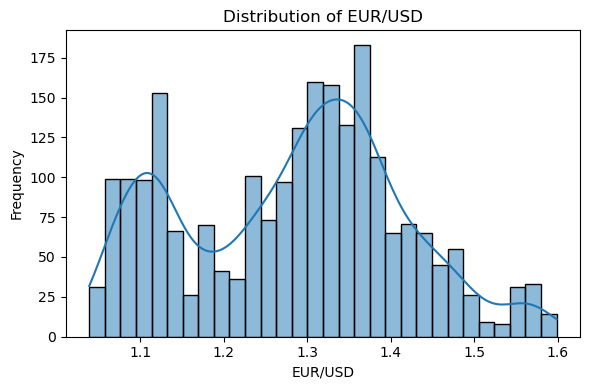

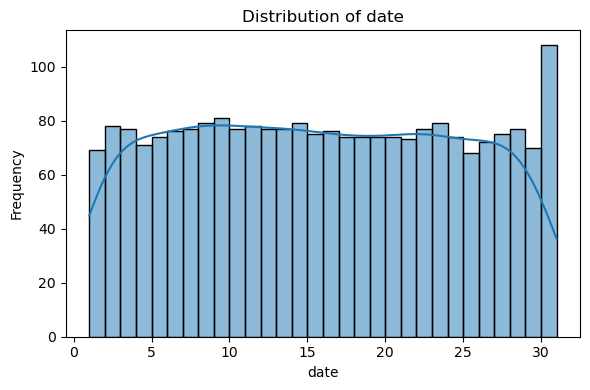

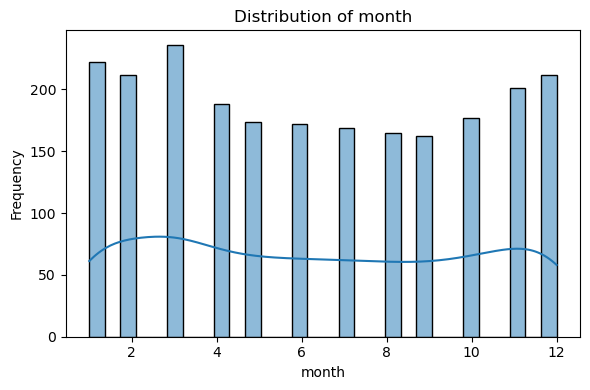

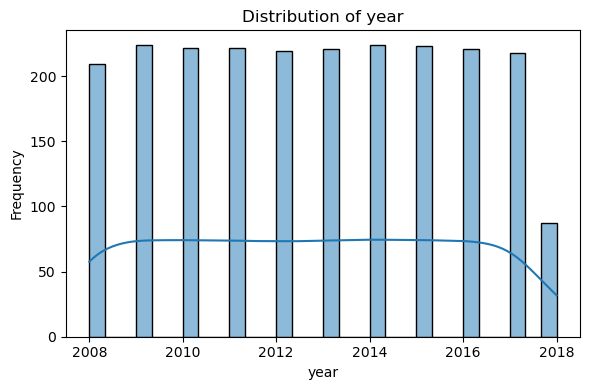

In [173]:
 # Univariate analysis: Distribution plots
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## Bivariant analysis 

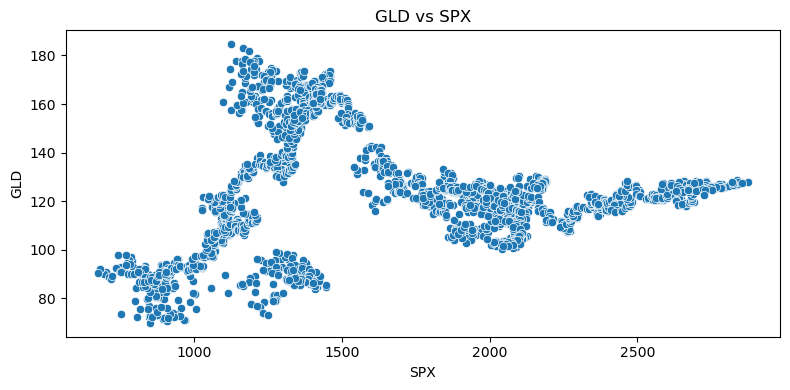

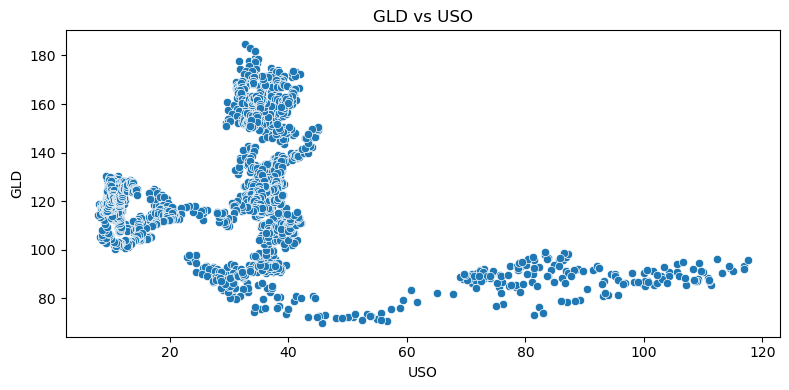

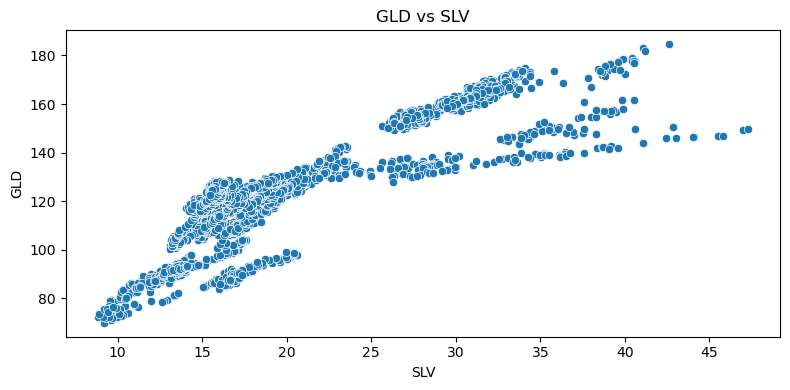

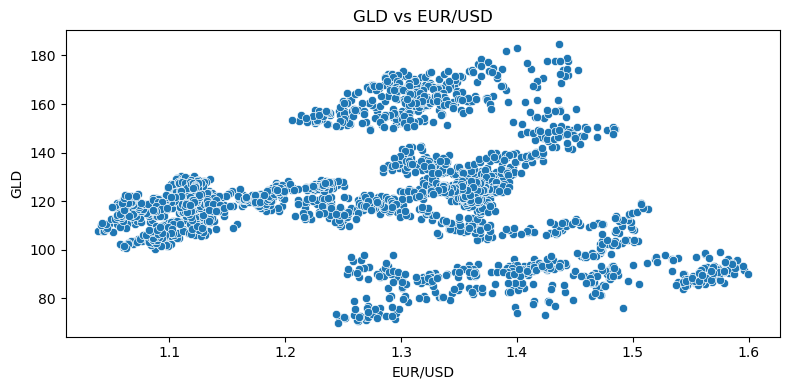

In [175]:
features = ['SPX', 'USO', 'SLV', 'EUR/USD']
for col in features:
    plt.figure(figsize = (8,4))
    sns.scatterplot(data = df ,x = col, y = 'GLD')
    plt.title (f'GLD vs {col}')
    plt .tight_layout()
    plt.show()
    

In [176]:
# Correlation with GLD
corr_with_gld = df.corr()['GLD'].sort_values(ascending=False)
print("Correlation of other variables with GLD:\n", corr_with_gld)

Correlation of other variables with GLD:
 GLD        1.000000
SLV        0.866632
year       0.206654
SPX        0.049345
month      0.020494
date      -0.000198
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


## Multivariate Analysis 

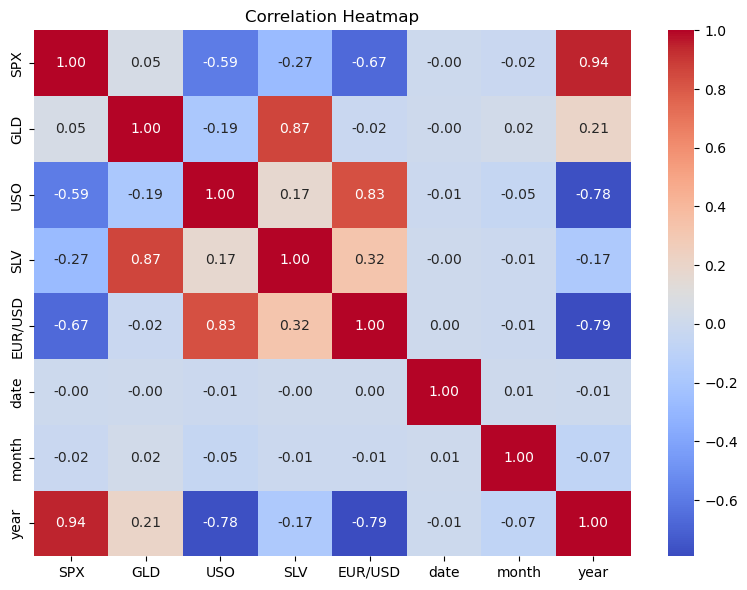

In [178]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt = '.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [179]:
# Splitting Data into Train data and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1832, 7)
(458, 7)
(1832,)
(458,)


In [180]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1832 entries, 486 to 1653
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      1832 non-null   float64
 1   USO      1832 non-null   float64
 2   SLV      1832 non-null   float64
 3   EUR/USD  1832 non-null   float64
 4   date     1832 non-null   int32  
 5   month    1832 non-null   int32  
 6   year     1832 non-null   int32  
dtypes: float64(4), int32(3)
memory usage: 93.0 KB


In [184]:
print(X_train.columns.tolist())

['SPX', 'USO', 'SLV', 'EUR/USD', 'date', 'month', 'year']


In [204]:
from os import pipe
# Creating a Pipeline Using makepipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
numerical_features = X_train.columns.tolist()  # safest approach


transformer = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), numerical_features)
])

pipe = make_pipeline(transformer, KNeighborsRegressor(n_neighbors=5))




In [206]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['SPX', 'USO', 'SLV',
                                                   'EUR/USD', 'date', 'month',
                                                   'year'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [208]:
# Let us create a Model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['SPX', 'USO', 'SLV',
                                                   'EUR/USD', 'date', 'month',
                                                   'year'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [210]:
y_pred = pipe.predict(X_test)

In [212]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error is:", mean_squared_error(y_pred,y_test))
print("Mean Absolute Error is:", mean_absolute_error(y_pred,y_test))
print("R2 Score is:", r2_score(y_pred,y_test))

Mean Squared Error is: 7.342284359761488
Mean Absolute Error is: 1.902624670742357
R2 Score is: 0.9854309944705628


In [214]:
import pickle 

In [216]:
# load model 
with open('knn_gold.pkl','wb') as f:
    model = pickle.dump(pipe,f)

# load scaler 
with open('knn_gold.pkl','rb') as f:
    scaler = pickle.load(f)